In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import sklearn.metrics as metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
data= pd.read_csv('NFLX.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
data.shape

(1009, 7)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Data Visualisation and Analysis

In [20]:
#data.index= data['Date']

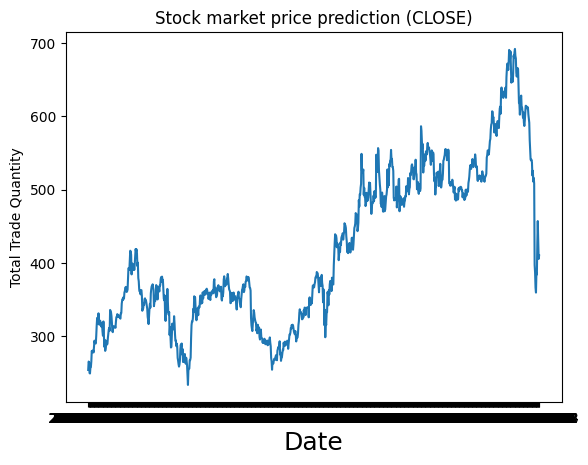

In [11]:
plt.plot(data['Close'])
plt.title('Stock market price prediction (CLOSE)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity')
plt.show()

In [12]:
max_value= data['High'].max()

In [13]:
max_value

700.98999

In [14]:
min_value= data['Low'].min()

In [15]:
min_value

231.229996

# Data Preprocessing

Converting int64 dtype to datetime64

In [16]:
data['Date']= pd.to_datetime(data['Date'])

In [22]:
data['Date']

Date
2018-02-05   2018-02-05
2018-02-06   2018-02-06
2018-02-07   2018-02-07
2018-02-08   2018-02-08
2018-02-09   2018-02-09
                ...    
2022-01-31   2022-01-31
2022-02-01   2022-02-01
2022-02-02   2022-02-02
2022-02-03   2022-02-03
2022-02-04   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [24]:
#Sorting the dateset according to the date

In [28]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-02-05,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [29]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-01-31,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
2022-02-03,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
2022-02-04,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


#Feature Scaling

In [30]:
df= data['Close']
scaler= MinMaxScaler(feature_range=(-1,1))

In [31]:
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [32]:
df

array([[-0.91096748],
       [-0.86090301],
       [-0.86597063],
       ...,
       [-0.14549701],
       [-0.24981978],
       [-0.22985514]])

#Splitting the data into train and test sets

In [33]:
train_size = int(len(df)*0.80)
test_size = len(df) - train_size
train_data = df[0:train_size,:]
test_data = df[train_size:len(df), :1]

In [34]:
train_size, test_size

(807, 202)

In [35]:
#converting an array of values into a dataset matrix
def datasetCnvrtd(dataset, time_step=1):
  x_data, y_data = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    x_data.append(a)
    y_data.append(dataset[i + time_step, 0])

  return np.array(x_data), np.array(y_data)

In [36]:
time_step = 100
x_train, y_train = datasetCnvrtd(train_data, time_step)
x_test, y_test = datasetCnvrtd(test_data, time_step)

In [37]:
print(x_train.shape)

(706, 100)


In [38]:
print(y_train.shape)

(706,)


In [39]:

#Reshaping input which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

#Building the model

In [40]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(x_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)


Epoch 1/60
10/10 [==============================] - 10s 346ms/step - loss: 0.0692 - val_loss: 0.0428
Epoch 2/60
10/10 [==============================] - 2s 237ms/step - loss: 0.0230 - val_loss: 0.0176
Epoch 3/60
10/10 [==============================] - 2s 166ms/step - loss: 0.0152 - val_loss: 0.0107
Epoch 4/60
10/10 [==============================] - 2s 167ms/step - loss: 0.0123 - val_loss: 0.0125
Epoch 5/60
10/10 [==============================] - 2s 165ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 6/60
10/10 [==============================] - 2s 168ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 7/60
10/10 [==============================] - 2s 165ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 8/60
10/10 [==============================] - 2s 220ms/step - loss: 0.0099 - val_loss: 0.0103
Epoch 9/60
10/10 [==============================] - 2s 228ms/step - loss: 0.0096 - val_loss: 0.0103
Epoch 10/60
10/10 [==============================] - 2s 173ms/step - loss: 0.0092 - val_loss: 0.010

In [42]:
test_predict = model.predict(x_test)


4/4 [==============================] - 1s 32ms/step


In [43]:
test_predict1 = scaler.inverse_transform(test_predict)


In [44]:
test_predict1

array([[541.5398 ],
       [537.76404],
       [531.943  ],
       [527.1679 ],
       [524.92664],
       [525.15485],
       [524.4203 ],
       [522.7297 ],
       [523.70435],
       [526.34265],
       [528.79974],
       [530.2614 ],
       [529.2429 ],
       [529.3308 ],
       [531.7572 ],
       [535.0828 ],
       [536.326  ],
       [540.43024],
       [545.6092 ],
       [548.803  ],
       [550.0047 ],
       [549.03925],
       [546.8312 ],
       [545.1894 ],
       [544.91113],
       [544.75256],
       [545.94006],
       [547.73975],
       [547.5335 ],
       [549.859  ],
       [554.5592 ],
       [560.03894],
       [563.98926],
       [565.31506],
       [566.0832 ],
       [568.2158 ],
       [569.5669 ],
       [569.6336 ],
       [570.04   ],
       [568.3902 ],
       [563.22943],
       [557.80804],
       [554.24664],
       [551.6184 ],
       [551.4876 ],
       [555.91   ],
       [561.2764 ],
       [566.51514],
       [570.75   ],
       [572.2597 ],


#Model Evaluation

In [45]:
#Checking the accuracy using mean squared error
mse=mean_squared_error(y_test, test_predict)
print(mse)

0.12236341482727207
